<a href="https://colab.research.google.com/github/carlosmr12/mlwk2023/blob/master/mlapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -r requirements.txt

  Using cached numpy-1.23.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 2.0 MB/s eta 0:00:001.1 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.2/198.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 6.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 5.9 MB/s eta 0:00:00m eta 0:00:010:00:01


  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.1
    Uninstalling llvmlite-0.38.1:
      Successfully uninstalled llvmlite-0.38.1
  Attempting uninstall: numba
    Found existing installation: numba 0.55.2
    Uninstalling numba-0.55.2:
      Successfully uninstalled numba-0.55.2
Note: you may need to restart the kernel to use updated packages.


In [5]:
%load_ext autoreload
%autoreload 2

from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
from rdkit.Chem.Draw import IPythonConsole #RDKit drawing
# A few settings to improve the quality of structures 
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit import Chem

from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeRegressor

import numpy as np
import pandas as pd
import time
import utils
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
df_data = pd.read_csv("data/ppi_inhibitors.minified.csv") # Load data from file to a DataFrame structure
print(df_data.shape) # .shape displays how the dataframe (matrix) looks like
df_data.head() # .head() displays the first few items in the dataframe

(1242, 9)


,SMILES,database,MolLogP,Acceptor_Count,Donor_Count,NumRotatableBonds,RingCount,MolWt,Experimental IC50 (log10)
0,FC(F)(F)c1cccc(NC(=O)Nc2ncccc2OCc3ccccc3)c1,timbal,5.3234,3,2,5,3,387.361,6.518557
1,C[C@H](N1C(=O)c2ccccc2C1(OCC3(CO)CC3)c4ccc(Cl)...,timbal,6.2006,3,2,7,5,482.407,5.050610
2,CC(=O)c1cc(-c2ccccn2)c2ccccn12,ippidb,3.2039,2,0,2,3,236.274,5.700000
3,FC(F)(F)c1cc(Cl)nc(n1)c2ccc(NC(=O)CCl)cn2,timbal,3.3881,4,1,3,2,351.115,5.853872
4,C[C@@H]1NC(=O)[C@H](CSSC[C@H](NC(=O)[C@@H]2CCC...,timbal,-0.2256,8,7,6,3,609.727,7.698970


In [7]:
print(df_data['database'].value_counts())

fig = px.pie(df_data, values=df_data['database'].value_counts().values, \
             names=df_data['database'].value_counts().index, \
             title='Data sources')

fig.show(renderer="colab")

timbal    702
ippidb    540
Name: database, dtype: int64


In [8]:
target = "Experimental IC50 (log10)"
fig = px.histogram(df_data, x=target)
fig.show(renderer="colab")

In [9]:
columns = ["MolLogP", "Acceptor_Count", "Donor_Count", "NumRotatableBonds", \
           "RingCount", "MolWt"]

fig = make_subplots(rows=3, cols=2, start_cell="bottom-left")

nlines = 3
ncolumns = 2

for i in range(nlines):
    for j in range(ncolumns):
        fig.add_trace(go.Histogram(x=df_data[columns[i+j]], name=columns[i+j]), row=i+1, col=j+1)

fig.show(renderer="colab")

FC(F)(F)c1cccc(NC(=O)Nc2ncccc2OCc3ccccc3)c1


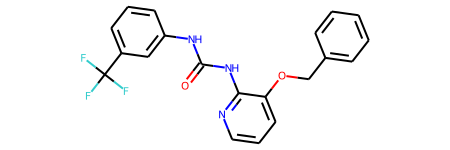

In [10]:
print(df_data.iloc[0]['SMILES'])
m = Chem.MolFromSmiles(df_data.iloc[0]['SMILES'])
m

In [11]:
THRESHOLD_POTENCY = 6